In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
%matplotlib inline

# 1. Moore's Law

### Download Data

In [2]:
cpu_data = pd.read_table('specdata20120207/benchmarks.txt',sep=',')
cpu_data.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,testID,benchName,base,peak
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1
1,cpu95-19990104-03254,102.swim,27.20,34.8
2,cpu95-19990104-03254,103.su2cor,10.10,9.98
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61
4,cpu95-19990104-03254,107.mgrid,8.94,9.44


### 1. Extract the date and base speed for a benchmark of your choice.

In [3]:
pd.unique(cpu_data.benchName) # to see what bases the data have

array(['101.tomcatv', '102.swim', '103.su2cor', '104.hydro2d',
       '107.mgrid', '110.applu', '125.turb3d', '141.apsi', '145.fpppp',
       '146.wave5', '099.go', '124.m88ksim', '126.gcc', '129.compress',
       '130.li', '132.ijpeg', '134.perl', '147.vortex', '168.wupwise',
       '171.swim', '172.mgrid', '173.applu', '177.mesa', '178.galgel',
       '179.art', '183.equake', '187.facerec', '188.ammp', '189.lucas',
       '191.fma3d', '200.sixtrack', '301.apsi', '164.gzip', '175.vpr',
       '176.gcc', '181.mcf', '186.crafty', '197.parser', '252.eon',
       '253.perlbmk', '254.gap', '255.vortex', '256.bzip2', '300.twolf',
       '400.perlbench', '401.bzip2', '403.gcc', '429.mcf', '445.gobmk',
       '456.hmmer', '458.sjeng', '462.libquantum', '464.h264ref',
       '471.omnetpp', '473.astar', '483.xalancbmk', '410.bwaves',
       '416.gamess', '433.milc', '434.zeusmp', '435.gromacs',
       '436.cactusADM', '437.leslie3d', '444.namd', '447.dealII',
       '450.soplex', '453.povray', 

In [4]:
# calculate the number of days between two dates
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

# set a benchmark at 099.go
benchmark = cpu_data['benchName'].unique()[10]
print(benchmark) 

# extract base and date data
go_data = cpu_data[(cpu_data['benchName'] == benchmark) & (cpu_data['testID'].str.startswith('cpu'))][['testID','base']]

go_data['testID'] = go_data['testID'].str[6:-6]
go_data['testID'] = pd.to_datetime(go_data['testID'])

# convert date to days
go_data['testID'] = go_data['testID'].map(lambda testID : ((testID - min(go_data['testID'])).days))

099.go


### 2. Plot the data in a semi-log plot.

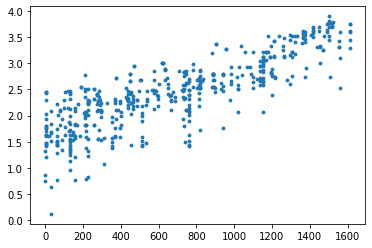

In [5]:
# convert base time to log
go_data['base'] = go_data['base'].astype(float)
go_data['logbase'] = np.log(go_data['base'])

plt.scatter(go_data['testID'],go_data['logbase'], 8)
plt.show()

### 3. Train a linear model to fit your plot.

Referece: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

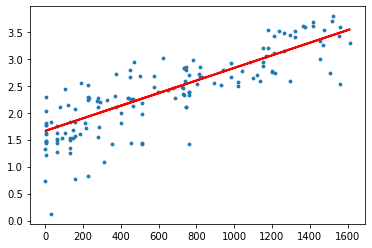

In [6]:
# split data into training and test sets
x_samples = len(go_data['testID'])
y_samples = len(go_data['logbase'])

x = np.array(go_data['testID']).reshape(x_samples, 1)
y = np.array(go_data['logbase']).reshape(y_samples, 1)

# split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# create a linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(x_train, y_train)

# make predictions using the testing set
y_pred = regr.predict(x_test)

# Plot
plt.scatter(x_test, y_test, 8)
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

### 4. How well is Moore’s law holding up?

In [7]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE): %.2f' % mse)

# The coefficient of determination (R^2): 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination (R^2): %.2f'% r2)

# The Median Absolute Error
mas = np.median(abs(y_test-y_pred))
print('Median Absolute Error (MAS): %.2f' % mas)

# The Mean Absolute Error
mae = np.mean(abs(y_test-y_pred))
print('Mean Absolute Error (MAE): %.2f' % mae)

Coefficients: 
 [[0.00116681]]
Mean Squared Error (MSE): 0.16
Coefficient of determination (R^2): 0.70
Median Absolute Error (MAS): 0.25
Mean Absolute Error (MAE): 0.30


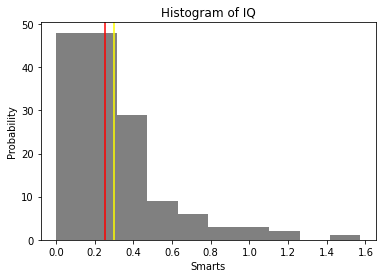

In [8]:
# histogram of errors
# a series of absolute errors
absErrors = abs(y_test-y_pred)

# show mean absolute error in red
plt.axvline(x=mas, color = 'red')

# show median absolute error in yellow
plt.axvline(x=mae, color = 'yellow')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')

plt.hist(absErrors, color = 'grey')
plt.show()

Given the MSE and R^2, we see that the Moore's law is holding up ok. We have the coefficient of determination (R^2) around 0.7 which suggests that around 70% of points fall within or explained by the regression line. All the MSE, MedAE, MAE are equal to or below 0.3 which suggests that overall, the true value and the measured value have small amount of differences between them. The Median Absolute Error is higher than Mean Absolute Error — it suggests that the errors are skewed to the left meaning there are few outliers. The histogram visualized above supports this. 

# 2. MNIST Digits
No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwriting digits (0-9).

### 1. Using scikit-learn, load the MNIST digits (see [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)).

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, average_precision_score

In [10]:
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


### 2. Plot some of the examples.

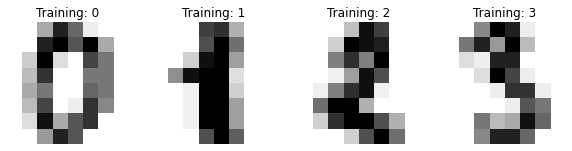

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [12]:
data, target = digits.images.reshape((1797,-1)), digits.target

### 3. Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.

In [13]:
# choosing 3 and 5
two_digits = np.where((target == 3) | (target == 8))

data_train, data_test, target_train, target_test = train_test_split(data[two_digits], target[two_digits], test_size=0.2)
print(data_train.shape, data_test.shape, target_train.shape, target_test.shape)

(285, 64) (72, 64) (285,) (72,)


In [14]:
# create KNN classifier with K=5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(data_train, target_train)

# predict results
target_pred = neigh.predict(data_test)

### 4. Report your error rates on a held out part of the data.

In [15]:
error_rate = 1 - sum(target_pred == target_test)/len(target_pred)
print("Error rate (for digits 3 and 8):", error_rate)

# Accuracy
accuracy = accuracy_score(target_test, target_pred)
print('Accuracy score is %.3f' %accuracy)

print(classification_report(target_test, target_pred, labels=[3, 8]))

Error rate (for digits 3 and 8): 0.01388888888888884
Accuracy score is 0.986
              precision    recall  f1-score   support

           3       1.00      0.97      0.99        39
           8       0.97      1.00      0.99        33

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



As most digits look quite distinct, I was getting error rate of 0 (e.g. for digits 1 and 2 or 3 and 5). Therefore, to test similar-looking digits and get non-zero error rates, I chose 3 and 8. The error rate for these digits is 0.013 making the accuracy rate 0.986. It means that the KNN model got 98.6% right when classifying digits 3 and 8.

Furthermore, for digit 3, we get 1 for precision and 0.97 for recall, meaning that 100% of all identifications of 3 was correct (no False Positives) and 97% actual 8s were identified correctly (there were some False Negatives, meaning that some digits that were idenfied as 3 were in fact 3).

For digit 8, it's the other way around. We get 0.97 for precision and 1 for recall. It means that 97% of identification of 8 was actually correct (there were some False Positives that some digits that were identified as 8 were in fact 3) and 100% of actual 8's were identified (There wasn't any False Negatives).

------------------

Here, instead of using a random hyperparameter K, I tune it using cross validation and train the model again.

In [16]:
# creating a random list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data_train, target_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1.


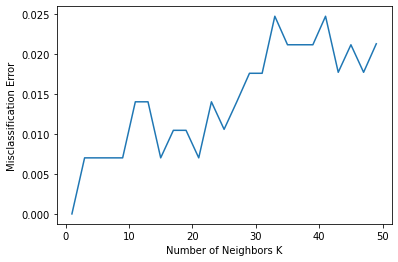

In [17]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}.".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [18]:
# create KNN classifier with K=1
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(data_train, target_train)

# predict results
target_pred = neigh.predict(data_test)

In [19]:
error_rate = 1 - sum(target_pred == target_test)/len(target_pred)
print("Error rate (for digits 3 and 8):", error_rate)

# Accuracy
accuracy = accuracy_score(target_test, target_pred)
print('Accuracy score is %.3f' %accuracy)

print(classification_report(target_test, target_pred, labels=[3, 8]))

Error rate (for digits 3 and 8): 0.0
Accuracy score is 1.000
              precision    recall  f1-score   support

           3       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        33

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



With optimal rate of K , we get 1 for the accuracy score meaning that our KNN model classified 3 and 8 100% correct this time.